# Dense Neural Networks

Now that we are familiar with simple parametric models (where weights and biases determine performance and must be optimized) for single neuron supervised learing models, it's time to add neurons in order to approximate much more complex target functions. At this point in our tour of ML models, we visit the T-Rex of supervised learning, the dense neural network.

These neural networks consist of multiple layers of interconnected neurons. Each neuron receives input from the previous layer and applies a linear transformation followed by a (non)linear activation function to produce its output, which becomes the input for the next layer. The output of the final layer is the output of the neural network.

Let's start by looking at how the output of a layer of neurons can act as the inputs to a new neuron. Consider a layer of neurons with inputs x1, x2, ..., xn and weights w1, w2, ..., wn, and a bias b. Just as with the single neuron case, its output is some function of $z$ where $z = w1 x1 + w2 x2 + ... + wn xn + b$. This, of course, is a scalar, or rather one of several entries into a new neuron. The process of feeding forward into the next layer can be repeated until the final layer is reached. In a dense neural network, each neuron in a layer is connected to every neuron in the previous layer, creating a fully connected network.

Now let's discuss activation functions. Activation functions are an essential part of a neural network as they introduce nonlinearity into the model. Without nonlinearity, the neural network would reduce to a linear regression model, and the model would not be able to learn complex relationships between inputs and outputs. There are several activation functions used in neural networks, including sigmoid, tanh, ReLU, and softmax. We have already seen the sigmoid function and how it provides a unique logistic shape. Let's take a look at some of the other ones:

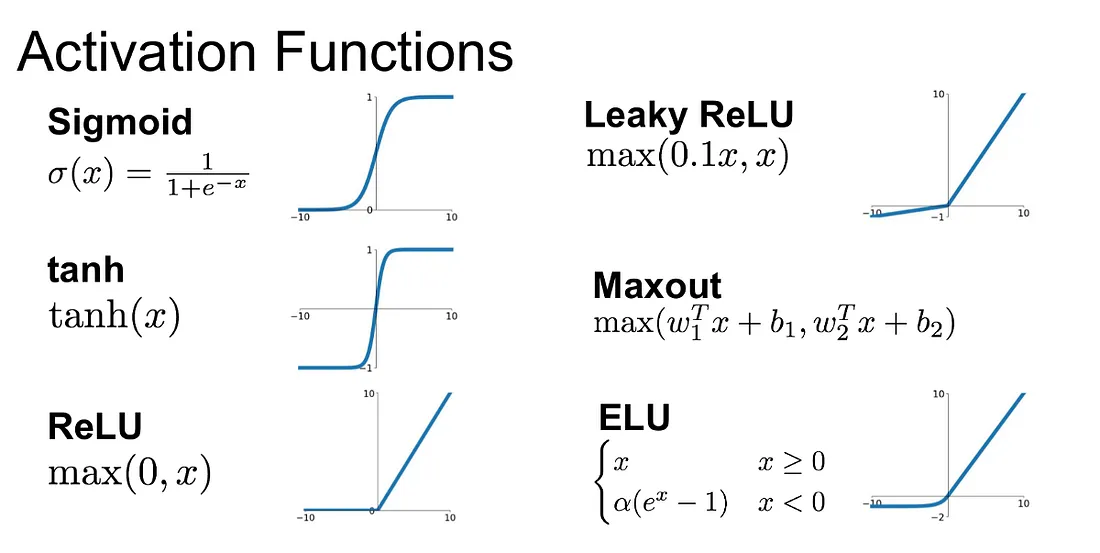
visual from https://medium.com/@shrutijadon/survey-on-activation-functions-for-deep-learning-9689331ba092

Next, let's talk about the feedforward phase and backpropagation phase of training a neural network. In the feedforward phase, the inputs are fed into the network, and the outputs are calculated using the weights and biases of the neurons. The output is then compared to the desired output, and the difference is used to calculate a loss function. The goal of training the neural network is to minimize the loss function.

In the backpropagation phase, the error in the output is propagated back through the network to adjust the weights and biases of the neurons. This process involves calculating the gradient of the loss function with respect to the weights and biases of each neuron and updating the weights and biases using a learning rate. The process is repeated until the loss function is minimized, and the neural network is trained.

While it would be a fun exercise to create my own dense neural network class, we get to the point in Machine Learning where you learn a lot more just getting your hands dirty with the packages that are available for free such as tensorflow. For this reason, we will not worry about the specific mathematics of the training of dense neural networks.

The performance of a neural network can be affected by several hyperparameters, such as the number of layers, the size of each layer, the activation functions used, and the learning rate. A deeper network with more layers can capture more complex relationships, but it can also lead to overfitting. A larger size of the layer can increase the number of parameters, which can lead to overfitting as well, but it can also improve the expressiveness of the model. Different activation functions can affect the behavior of the network and its ability to learn, and the learning rate can affect the speed and stability of the training process. Finding the right combination of hyperparameters can be a challenging task, and it often requires experimentation and tuning.

Finally, let's summarize the advantages and disadvantages of neural networks as a supervised learning model. One advantage of neural networks is their ability to learn complex relationships between inputs and outputs, making them well-suited for tasks such as image and speech recognition. They can also handle large amounts of data and can generalize well to new data if trained properly.

However, neural networks can be computationally expensive and require a large amount of training data to avoid overfitting. They can also be difficult to interpret, and it can be hard to understand how the network arrived at its decision. Additionally, finding the right hyperparameters can be a challenging task, and the training process can take a long time.

In conclusion, dense neural networks are a powerful tool for supervised learning, allowing us to learn complex relationships between inputs and outputs. Understanding how they work, including their activation functions, feedforward and backpropagation phases, and hyperparameters, is crucial for building effective models. While neural networks have their advantages and disadvantages, they remain a popular and widely-used technique for solving a variety of machine learning problems.

## Application and Analysis

Let's try to predict how far each team gets in the tournament from our cbb dataset. Of course, we have added a lot of complexity to the problem by expanding it from a simple binary classification, so it is fitting we use a more complex model. Let's use `tensorflow` to create our model, to avoid creating our own custom dense neural network class.

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [ ]:
# Load the dataset
url = r"https://raw.githubusercontent.com/joshyaffee/A-First-Semester-of-Machine-Learning---INDE-577/main/cbb.csv"
df = pd.read_csv(url)
# df.drop not in tournament
df = df.dropna()
df = df[df['POSTSEASON'] != 'R68']

# Extract the relevant columns
X = df.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22]].values
y = df.iloc[:, 21].values

from sklearn.preprocessing import StandardScaler

# Create the scaler object
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)
X = X_scaled

# encode y
y_decoding = {6: 'Champions', 5: '2ND', 4: 'F4', 3: 'E8', 2: 'S16', 1: 'R32', 0: 'R64'}
y_encoding = {ps:i for i,ps in y_decoding.items()}
y_encoded = np.array([y_encoding[ps] for ps in y])

y = y_encoded

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(60, activation='LeakyReLU'),
  tf.keras.layers.Dense(30, activation='LeakyReLU'),
  tf.keras.layers.Dense(15, activation='sigmoid'),
  tf.keras.layers.Dense(7)
])

Note the importance of setting the final layer to a sigmoid function so that the result has the rough interpretation of a probability. Let's train our model.

In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(Xtrain, ytrain, epochs=500, verbose = 0)
model.evaluate(Xtrain,  ytrain, verbose=2)

10/10 - 1s - loss: 0.0409 - accuracy: 0.9968 - 559ms/epoch - 56ms/step


[0.040923599153757095, 0.9968051314353943]

Let's take a look at how well the model can capture the complexity of this task

10/10 [==============================] - 0s 2ms/step


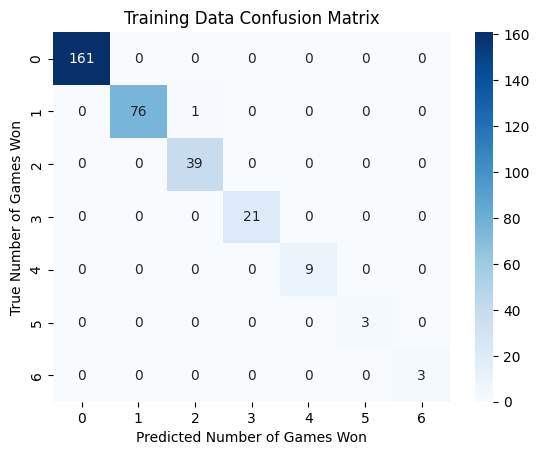

In [ ]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix

# get the predicted probabilities for each class
y_pred_prob = model.predict(Xtrain)

# get the predicted class for each sample
ypred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(ytrain, ypred, labels=[0, 1, 2, 3, 4, 5, 6])

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add axis labels and a title
plt.xlabel('Predicted Number of Games Won')
plt.ylabel('True Number of Games Won')
plt.title('Training Data Confusion Matrix')

# Show the plot
plt.show()

Almost perfect... Which probably signifies overfitting... let's take a look.

5/5 [==============================] - 0s 2ms/step


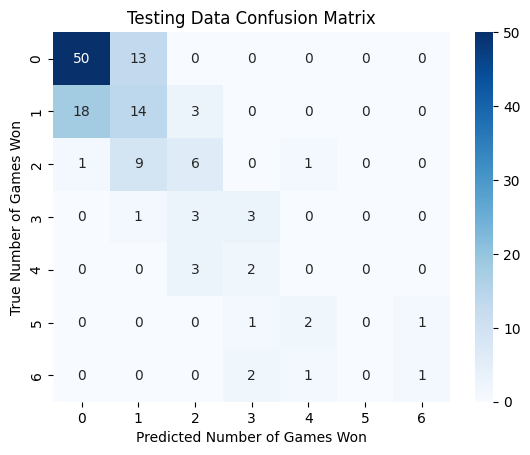

In [ ]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix

# get the predicted probabilities for each class
y_pred_prob = model.predict(Xtest)

# get the predicted class for each sample
ypred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(ytest, ypred, labels=[0, 1, 2, 3, 4, 5, 6])

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add axis labels and a title
plt.xlabel('Predicted Number of Games Won')
plt.ylabel('True Number of Games Won')
plt.title('Testing Data Confusion Matrix')

# Show the plot
plt.show()

Our model is definitely overfitting a bit, but we still get very reasonable results on the testing data. 